In [1]:
from KT_model import *
from SpecRepMethod import *
from functools import partial
from utils import EPSD_show, specgram3d

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a_simu_instance = SRM(wu=100, N1=1024, fs=50, duration=8)

In [4]:
# Take a look at the shape
print("the shape of the w axis:", a_simu_instance.w_axis_4simu.shape)
print("the shape of the time axis:", a_simu_instance.t_axis_4simu.shape)

the shape of the w axis: (1024,)
the shape of the time axis: (400,)


### Recall what we've done:
1. create the `w_axis` and `t_axis`;
2. create the separable spectrum;
3. generate simulations

#### A KT stationary model

In [5]:
a_parameterized_KT_model = partial(parameterize_KT_model, wg=5 * np.pi, zzeta = 0.63, S0= 0.011)

In [6]:
Sww_KT = SRM.getSww_from_a_model(a_parameterized_KT_model, a_simu_instance.w_axis_4simu)

In [7]:
Sww_KT.shape

(1024,)

In [8]:
# As a stationary model, spectra is 1d on w_axis, see the plot below

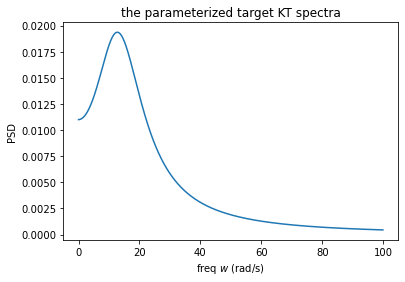

In [9]:
plt.plot(a_simu_instance.w_axis_4simu, Sww_KT)
plt.title("the parameterized target KT spectra")
plt.xlabel(r'freq $w$ (rad/s)')
plt.ylabel('PSD')
plt.show()

the lower limit of sampling frequency: 32
the length of the simulation (400,)


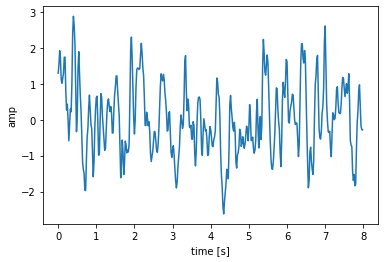

In [10]:
KT_simulation_amp = a_simu_instance._SpecRepsentation0(Sww_KT, plot='y')

#### A separatble non-stationary spectra

In [11]:
Swt_spectra = get_nonsta_spectra(Sww_KT, 
                                 envelop_func=Envelop_tfunc1, 
                                 t_axis=a_simu_instance.t_axis_4simu)

the shape of the nonstationary spectra $S_{wt}$: (1024, 400)


In [12]:
Swt_spectra.shape

(1024, 400)

In [13]:
# with the spectra 'S(w, t)', let's show it in 3d plots

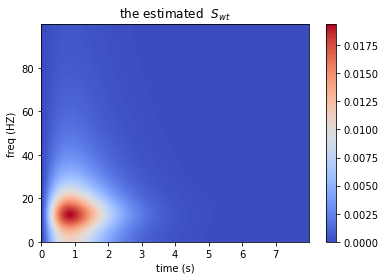

In [14]:
EPSD_show(Swt_spectra, a_simu_instance.w_axis_4simu, a_simu_instance.t_axis_4simu, format='2d')

<Figure size 432x288 with 0 Axes>

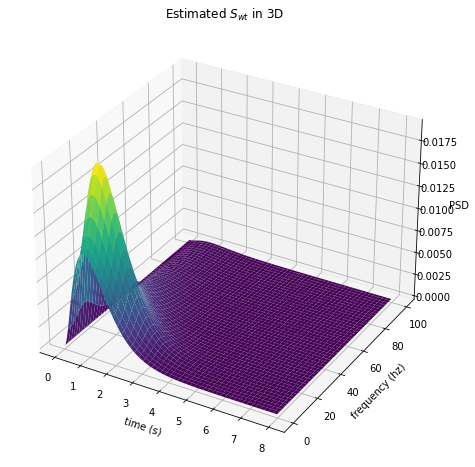

In [15]:
EPSD_show(Swt_spectra, a_simu_instance.w_axis_4simu, a_simu_instance.t_axis_4simu, format='3d')

the lower limit of sampling frequency: 32
the length of the simulation (400,)


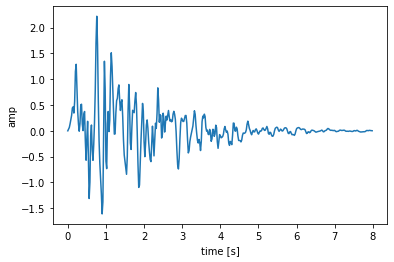

In [16]:
a_nonsta_simulation = a_simu_instance._SpecRepsentation0(Swt_spectra, plot='y')